# NEMA Photoelectric

- Photoelectric interaction in PETALO

In [1]:
import Pkg

In [2]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [3]:
Pkg.add.(["Test"]);

In [4]:
Pkg.add.(["VegaLite","VegaDatasets"]);

In [5]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [6]:
using LsqFit
using GLM

In [7]:
using HTTP
using Plots
using VegaLite
using VegaDatasets
using DataFrames
using HDF5
using DrWatson
using Test
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [8]:
using Glob
using CSV

In [9]:
using Statistics
using StatsBase
using Printf

In [10]:
using Logging

In [11]:
@quickactivate "JPetalo"

In [12]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [13]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [14]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [821]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

In [16]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [17]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

In [18]:
function grfq(q)
    return Float32(326.9 + 0.0226 * q)
end
rfq(q::Float32) = grfq(q)
rfq(q::Float64) = grfq(q)

rfq (generic function with 2 methods)

In [19]:
function grfq2(q)
    return Float32(297.85 + 0.031 * q)
end
rfq2(q::Float32) = grfq(q)
rfq2(q::Float64) = grfq(q)

rfq2 (generic function with 2 methods)

# Characterization of PETALO

In [366]:
loglevel("Info")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(42) open, 0 bytes waiting))), Debug, Dict{Any, Int64}())

### Read a summary data frame with photoelectric interactions

In [844]:
drx = datadir("nema3df")
input = string(drx,"/nemadf_f300_detconf_pde_03_sigmatof_85ps_kmeans_phot.csv")
n3df = DataFrame(CSV.File(input));

In [845]:
println(names(n3df))

["nsipm1", "nsipm2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "trdt", "trmdt", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zt1", "zt2"]


## Dependence of energy with radius of interaction
- Histograming the energy deposited in the SiPMs yields a wide and non gaussian distribution
- The reason is that the energy deposited in the SiPMs depends of the radius at which the gamms interacted.
- The relation is roughly linear in a good range of radius, cannot be used for charge too low and saturates for charge too high
- This dependence can be used to define an estimator, "rq" of the radius of interaction

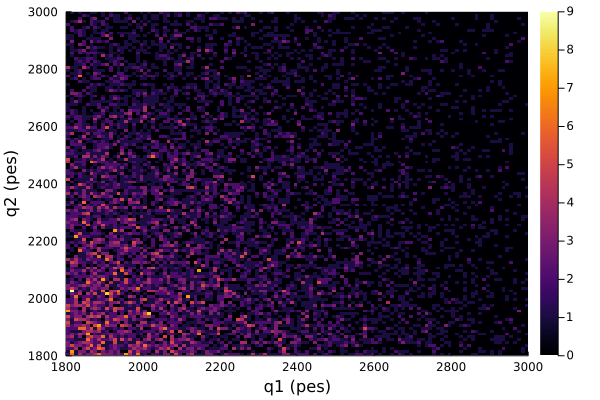

In [837]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.q1,n3df.q2, 150, "q1 (pes)", "q2 (pes)", 0., 10000., 0., 10000.)
plot(phqr, legend=false, fmt = :png)

In [846]:
@info names(n3df)

┌ Info: ["nsipm1", "nsipm2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "trdt", "trmdt", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zt1", "zt2"]
└ @ Main In[846]:1


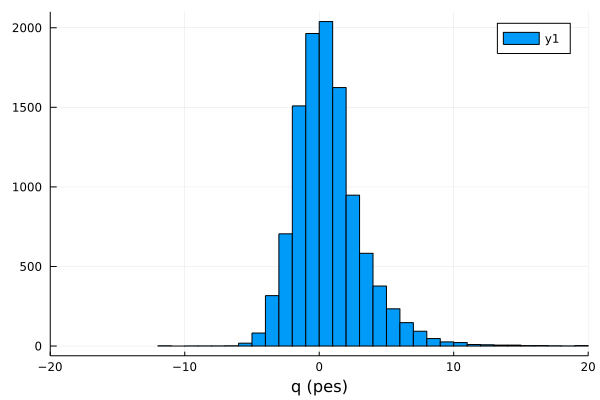

In [838]:
hqc = JPetalo.hist1d(n3df.r1 - n3df.r1q, 50, -20., 20.)
phqc = plot(hqc, xlim=(-20., 20.), xlabel="q (pes)")

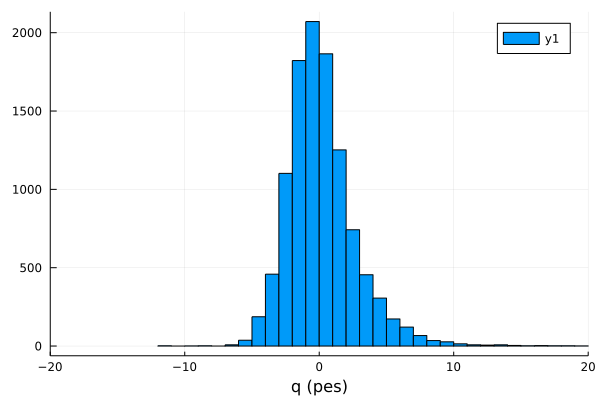

In [839]:
hqc = JPetalo.hist1d(n3df.r1 - rfq.(n3df.q1), 50, -20., 20.)
phqc = plot(hqc, xlim=(-20., 20.), xlabel="q (pes)")

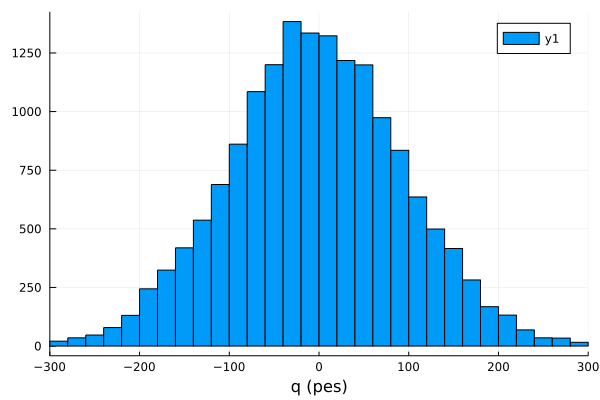

In [854]:
hqc = JPetalo.hist1d((n3df.t1 - n3df.t2- (n3df.tr1 - n3df.tr2))*1000., 50, -300., 300.)
phqc = plot(hqc, xlim=(-300., 300.), xlabel="q (pes)")

In [855]:
JPetalo.mean_std((n3df.t1 - n3df.t2- (n3df.tr1 - n3df.tr2))*1000.0, -200.0, 200.0)

(-3.0767368889173285, 86.47642899829923)

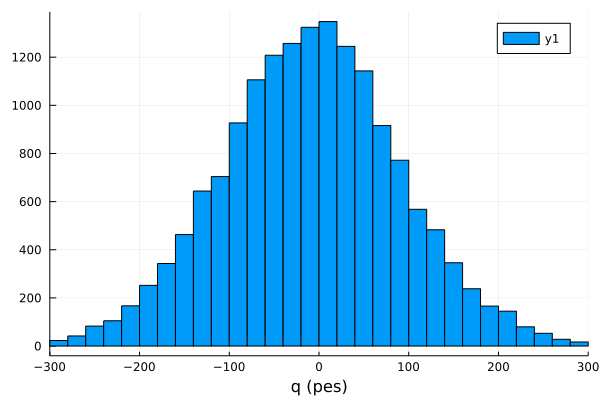

In [857]:
hqc = JPetalo.hist1d((n3df.t1 -n3df.t2 -(n3df.ta1 - n3df.ta2))*1000., 50, -300., 300.)
phqc = plot(hqc, xlim=(-300., 300.), xlabel="q (pes)")

In [858]:
JPetalo.mean_std((n3df.t1 -n3df.t2 -(n3df.ta1 - n3df.ta2))*1000., -200.0, 200.0)

(-7.572214400440046, 86.45302586674462)

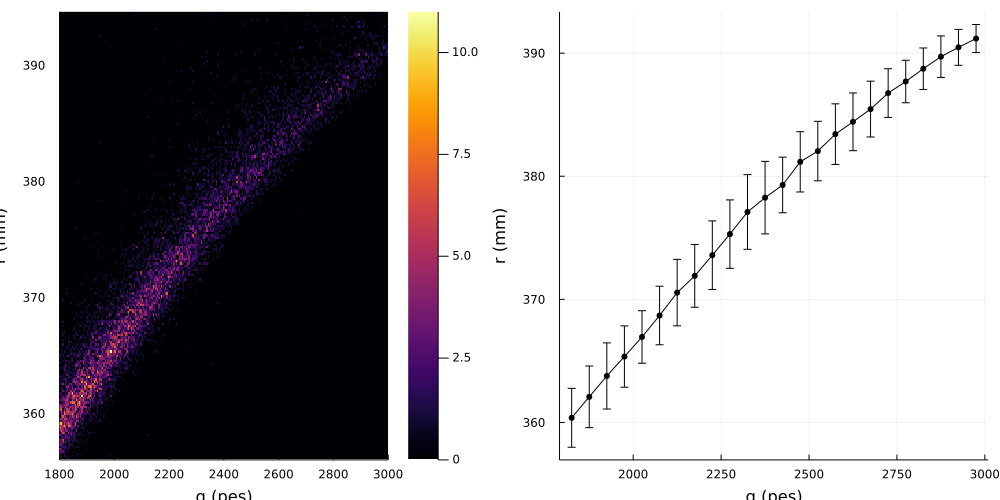

In [668]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.q1,n3df.r1, 250, "q (pes)", "r (mm)")
pqrdf = JPetalo.p1df(n3df.q1, n3df.r1, 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("q (pes)")
ylabel!("r (mm)")
plot(phqr, pp, legend=false, size = (1000, 500), fmt = :png)

### Below 5000 pes no reliable fit.

In [589]:
n3h1q0 = JPetalo.select_by_column_value_interval(n3df, "q1", 3000.0, 5200.0);

In [590]:
function fcqr(df; h=1, qmin=3000.0, qmax=5200.0, bin=5)
    function qr(h)
    if h==1
        return "q1", "r1"
    else
        return "q2", "r2"
    end
end
    qq, rr = qr(h)
    dfq   = JPetalo.select_by_column_value_interval(df, qq, qmin, qmax)
    pqrdf = JPetalo.p1df(dfq[!,qq], dfq[!,rr], bin)
    lfqr, pqr, cqr = JPetalo.lfit(pqrdf);
    return pqrdf, lfqr, pqr, cqr
end

fcqr (generic function with 5 methods)

## Fit in range (5200, 9000) 

### hemisphere 1

In [669]:
pqrdf, lfqr, pqr, cqr = fcqr(n3df, h=1, qmin=1800.0, qmax=3000.0, bin=25);

┌ Info: cqr
│   cqr = [312.2867216137105, 0.027247088183114842]
└ @ Main In[670]:1


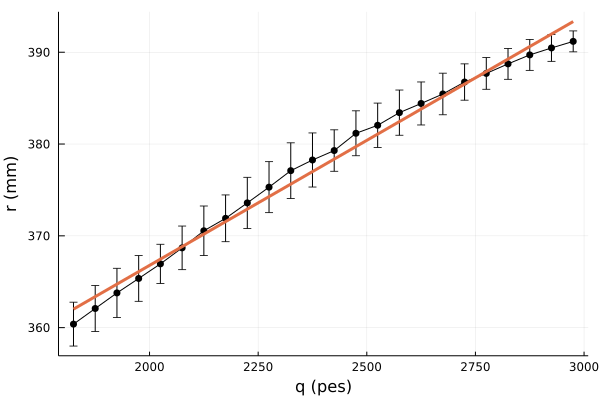

In [670]:
@info "cqr" cqr
pqr = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pqr = plot!(pqr,pqrdf.x_mean,lfqr, lw=3, legend=false)
ylabel!("r (mm)")
xlabel!("q (pes)")

### hemisphere 2

┌ Info: cqr
│   cqr = [312.57848881728256, 0.02726821828835427]
└ @ Main In[672]:2


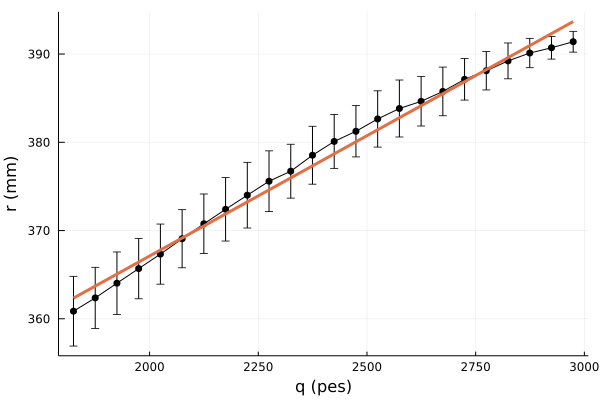

In [672]:
pqrdf, lfqr, pqr, cqr = fcqr(n3df, h=2, qmin=1800.0, qmax=3000.0, bin=25)
@info "cqr" cqr
pqr = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pqr = plot!(pqr,pqrdf.x_mean,lfqr, lw=3, legend=false)
ylabel!("r (mm)")
xlabel!("q (pes)")

## Fit function

In [673]:
function rfq(q::Float64)
    return 312.5 + 0.027 * q
end

rfq (generic function with 8 methods)

### Fitted R as a function of q

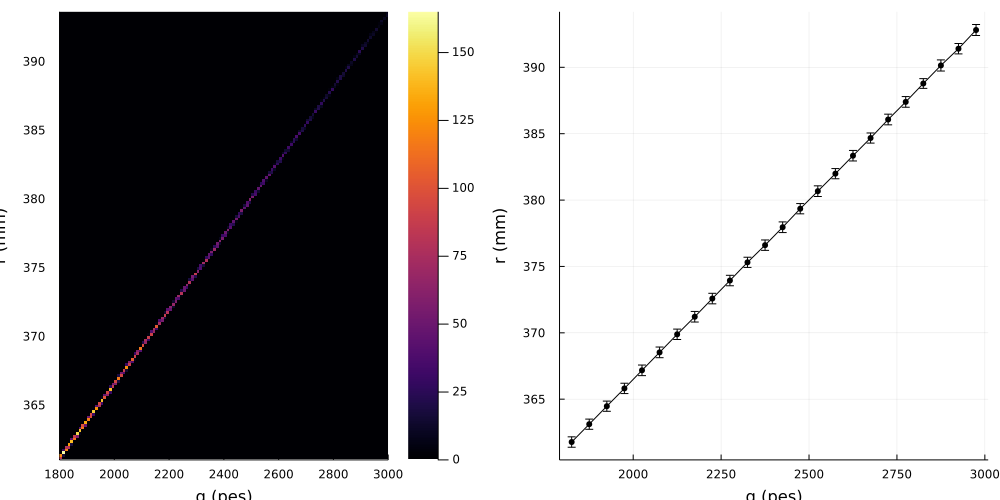

In [674]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.q1,rfq.(n3df.q1), 150, "q (pes)", "r (mm)")
pqrdf = JPetalo.p1df(n3df.q1, rfq.(n3df.q1), 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("q (pes)")
ylabel!("r (mm)")
plot(phqr, pp, legend=false, size = (1000, 500), fmt = :png)

## Fitted R as a function of R

### Using all range

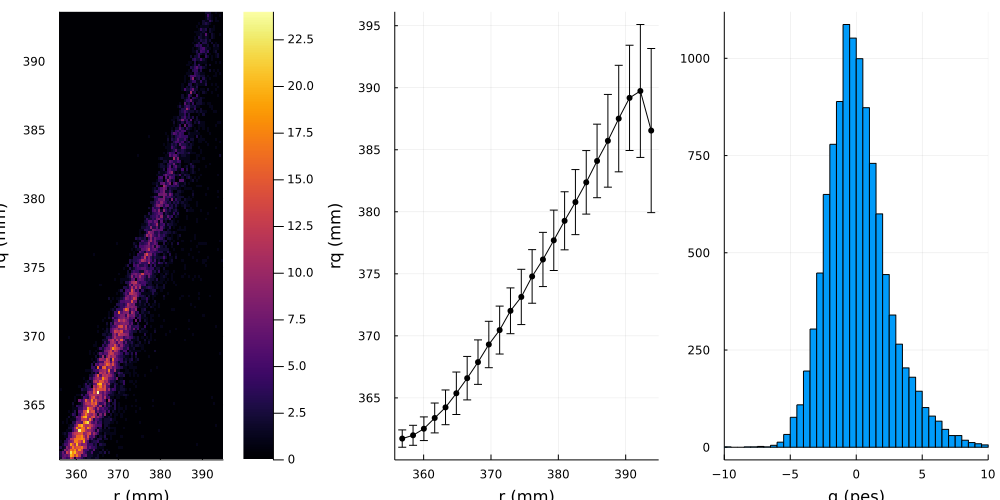

In [675]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.r1,rfq.(n3df.q1), 150, "r (mm)", "rq (mm)")
pqrdf = JPetalo.p1df(n3df.r1, rfq.(n3df.q1), 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("r (mm)")
ylabel!("rq (mm)")
hqc = JPetalo.hist1d(n3df.r1 - rfq.(n3df.q1), 50, -10., 10.)
phqc = plot(hqc, xlim=(-10., 10.), xlabel="q (pes)");
plot(phqr, pp, phqc, layout = (1, 3), legend=false, size = (1000, 500), fmt = :png)

In [676]:
xmu, xstd = JPetalo.mean_std(n3df.r1 - rfqx.(n3df.q1), -4.0, 4.0)

(2.938406986301369, 0.8281269324854524)

### Cutting at 390 

In [677]:
n3h1q   = JPetalo.select_by_column_value_interval(n3df, "q1", 1800., 3000.)
n3h1qr   = JPetalo.select_by_column_value_interval(n3df, "r1", 355.5, 390);

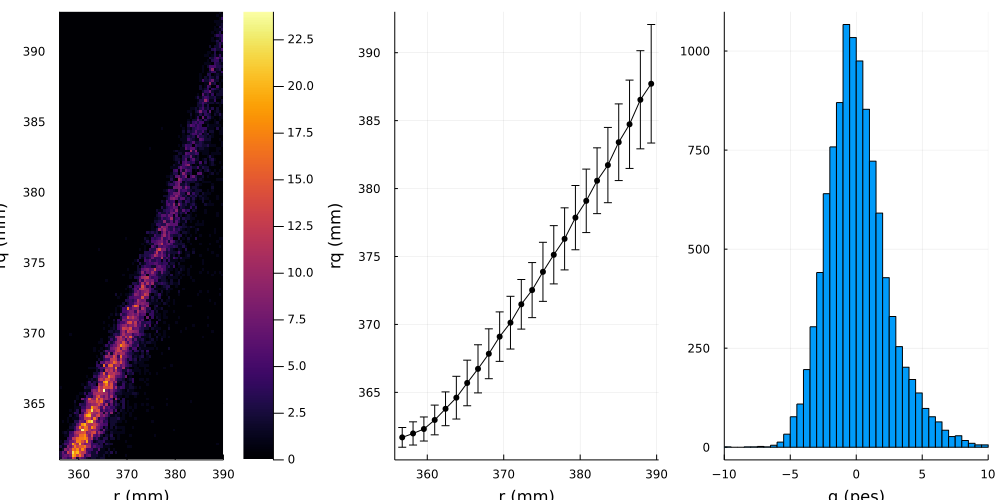

In [679]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3h1qr.r1,rfq.(n3h1qr.q1), 150, "r (mm)", "rq (mm)")
pqrdf = JPetalo.p1df(n3h1qr.r1, rfq.(n3h1qr.q1), 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("r (mm)")
ylabel!("rq (mm)")
hqc = JPetalo.hist1d(n3h1qr.r1 - rfq.(n3h1qr.q1), 50, -10., 10.)
phqc = plot(hqc, xlim=(-10., 10.), xlabel="q (pes)");
plot(phqr, pp, phqc, layout = (1, 3), legend=false, size = (1000, 500), fmt = :png)

In [680]:
xmu, xstd, mu, std, NN, xg, yg = JPetalo.fit_gauss(n3h1qr.r1 - rfq.(n3h1qr.q1), -3.0, 3.0, 25)

(-0.16753005316339387, 1.4700825992495672, -0.30312920616192573, 1.9340487266474087, 1024.691186384723, [-2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75], [460.28155810515295, 617.3863098365568, 774.5764013327703, 908.9612593508249, 997.7008259851591, 1024.3046299510804, 983.6300446780732, 883.503514499686, 742.2643852677649, 583.287689548608, 428.72700892395915, 294.74925993862456])

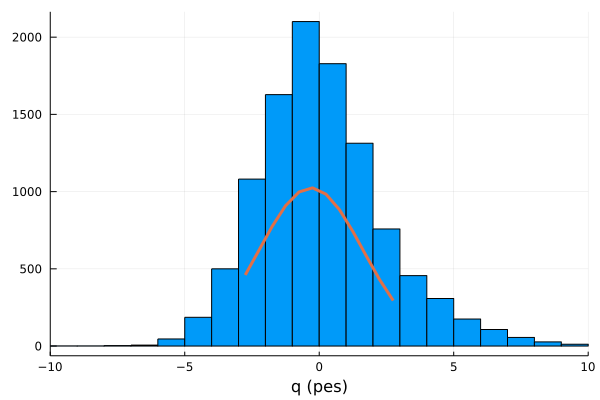

In [681]:
hqc = JPetalo.hist1d(n3h1qr.r1 - rfq.(n3h1qr.q1), 25, -10., 10.)
phqc = plot(hqc, xlim=(-10., 10.), xlabel="q (pes)", legend=false)
phqc = plot!(phqc, xg, yg, lw=3, xlimit=(-10.0,10.0), legend=false) 

### Number of SiPMs with charge above threshold

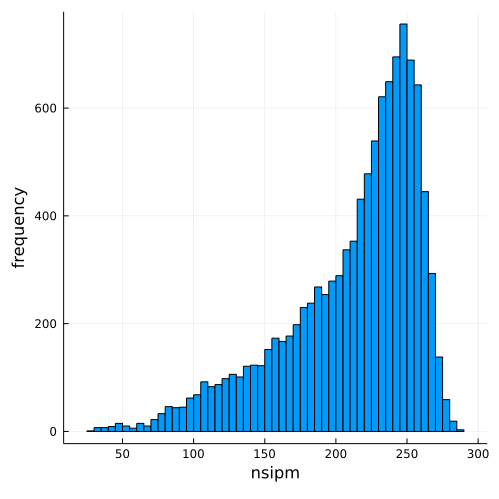

In [682]:
hnsipm, pnsipm = JPetalo.hist1d(n3df.nsipm1,  "nsipm", 50);
plot(pnsipm,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png)

## zstd

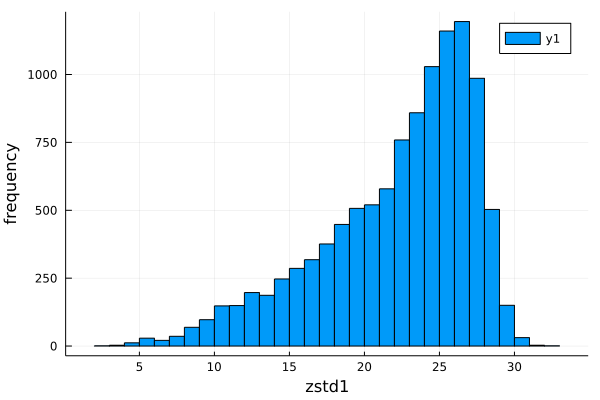

In [683]:
hzstd, pzstd = JPetalo.hist1d(n3df.zstd1, "zstd1", 50,  0., 35.)
plot(pzstd)

In [686]:
n3h1z = JPetalo.select_by_column_value_interval(n3df, "zstd1", 5.0, 30.0);

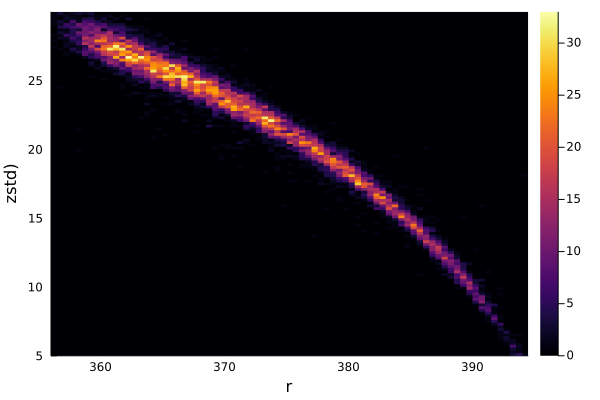

In [687]:
xe,ye,hrzstd,przstd = JPetalo.hist2d(n3h1z.r1, n3h1z.zstd1, 150, "r", "zstd)")
plot(przstd)

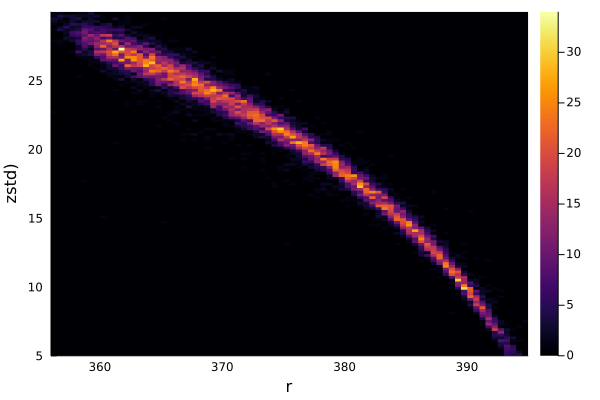

In [688]:
n3h2z = JPetalo.select_by_column_value_interval(n3df, "zstd2", 5.0, 30.0);
xe,ye,hrzstd,przstd = JPetalo.hist2d(n3h2z.r2, n3h2z.zstd2, 150, "r", "zstd)")
plot(przstd)

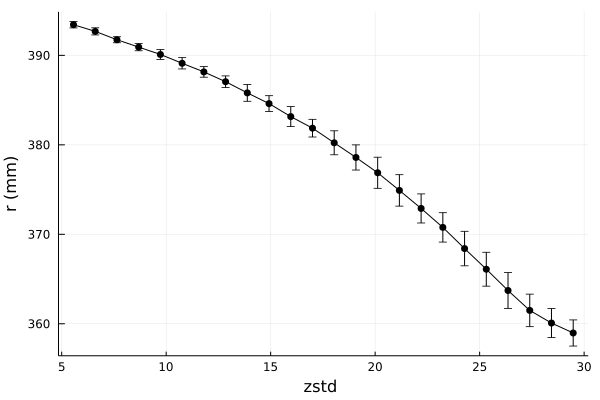

In [689]:
pqrdf = JPetalo.p1df(n3h1z.zstd1, n3h1z.r1 , 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("zstd ")
ylabel!("r (mm)")

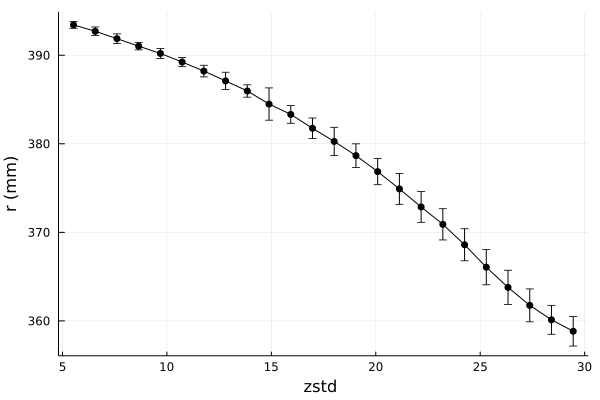

In [690]:
pqrdf2 = JPetalo.p1df(n3h2z.zstd2, n3h2z.r2 , 25)
pp2 = plot(pqrdf2.x_mean,pqrdf2.y_mean, yerror=pqrdf2.y_std, shape = :circle, color = :black, legend=false)
xlabel!("zstd ")
ylabel!("r (mm)")

In [694]:
function rfz(z)
    return 392.6 - 0.19 * z -0.037 * z^2
end

rfz (generic function with 1 method)

In [625]:
function fit_pol2(x,y)
    @. pol(x, p) = p[1] + p[2] * x + p[3] * x^2 
    p0 = [1.0, 1.0, 1.0]
    fq = curve_fit(pol, x, y, p0)
    cfq = coef(fq)
    @info "coef(fq)" cfq
    sfq = stderror(fq)
    @info "std(fq)" sfq
    @info "margin_of_error (90%)" margin_error(fq, 0.1)
    @info " confidence_interval (90%)" confidence_interval(fq, 0.1)
    return cfq
end


fit_pol2 (generic function with 1 method)

In [692]:
cfq = fit_pol2(pqrdf.x_mean, pqrdf.y_mean)

┌ Info: coef(fq)
│   cfq = [395.5982778319014, -0.19159061108842415, -0.03740582260290842]
└ @ Main In[625]:6
┌ Info: std(fq)
│   sfq = [0.6028972985180656, 0.07597978683985133, 0.0021327467818475936]
└ @ Main In[625]:8
┌ Info: margin_of_error (90%)
│   margin_error(fq, 0.1) = [1.0374312475494156, 0.1307416789618335, 0.0036699088883591193]
└ @ Main In[625]:9
┌ Info:  confidence_interval (90%)
│   confidence_interval(fq, 0.1) = [(394.56084658435196, 396.6357090794508), (-0.32233229005025765, -0.06084893212659065), (-0.041075731491267545, -0.0337359137145493)]
└ @ Main In[625]:10


3-element Vector{Float64}:
 395.5982778319014
  -0.19159061108842415
  -0.03740582260290842

In [693]:
cfq2 = fit_pol2(pqrdf2.x_mean, pqrdf2.y_mean)

┌ Info: coef(fq)
│   cfq = [395.65946726972055, -0.19609784296740868, -0.03734580210772171]
└ @ Main In[625]:6
┌ Info: std(fq)
│   sfq = [0.5339888174501904, 0.06744239438272447, 0.0018963942375272212]
└ @ Main In[625]:8
┌ Info: margin_of_error (90%)
│   margin_error(fq, 0.1) = [0.9188574678083227, 0.11605102148271279, 0.0032632069251583087]
└ @ Main In[625]:9
┌ Info:  confidence_interval (90%)
│   confidence_interval(fq, 0.1) = [(394.7406098019122, 396.5783247375289), (-0.31214886445012147, -0.08004682148469588), (-0.04060900903288002, -0.0340825951825634)]
└ @ Main In[625]:10


3-element Vector{Float64}:
 395.65946726972055
  -0.19609784296740868
  -0.03734580210772171

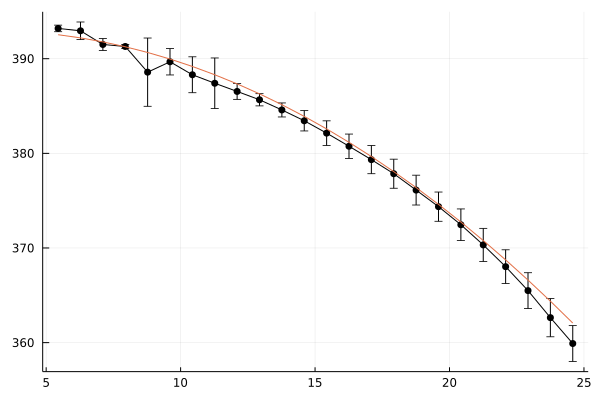

In [644]:
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pp = plot!(pp, pqrdf.x_mean, rfz.(pqrdf.x_mean))

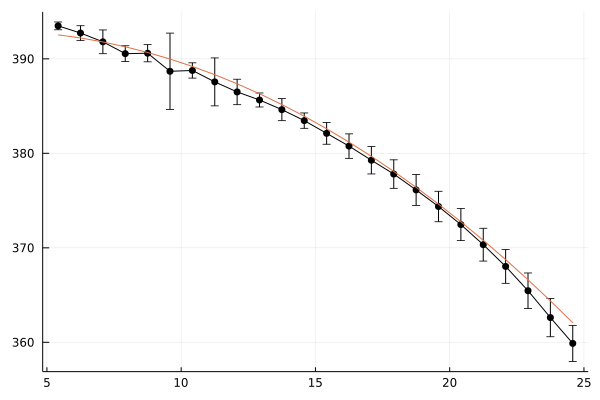

In [645]:
pp = plot(pqrdf2.x_mean,pqrdf2.y_mean, yerror=pqrdf2.y_std, shape = :circle, color = :black, legend=false)
pp = plot!(pp, pqrdf2.x_mean, rfz.(pqrdf2.x_mean))

## Fitted R from zstd as a function of R

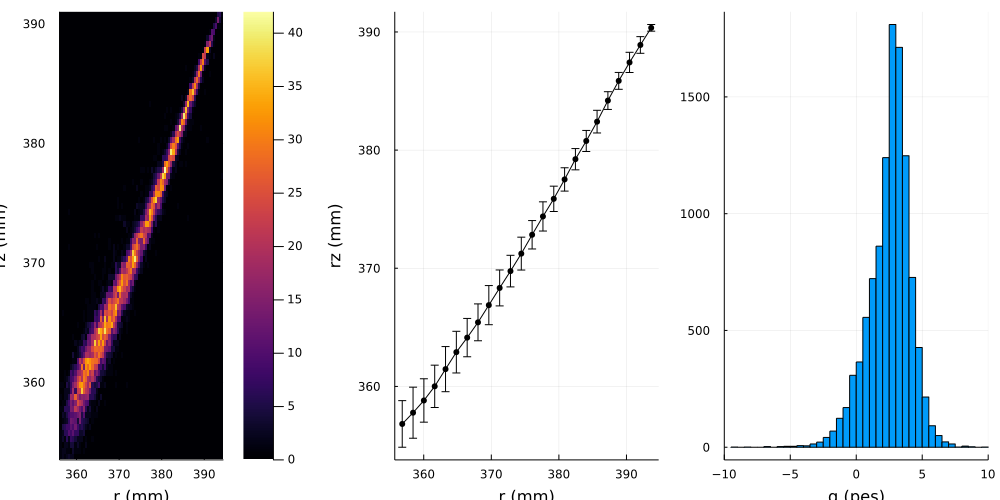

In [695]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3h1z.r1,rfz.(n3h1z.zstd1), 150, "r (mm)", "rz (mm)")
pqrdf = JPetalo.p1df(n3h1z.r1, rfz.(n3h1z.zstd1), 25)
pp = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
xlabel!("r (mm)")
ylabel!("rz (mm)")
hqc = JPetalo.hist1d(n3h1z.r1 - rfz.(n3h1z.zstd1), 50, -10., 10.)
phqc = plot(hqc, xlim=(-10., 10.), xlabel="q (pes)");
plot(phqr, pp, phqc, layout = (1, 3), legend=false, size = (1000, 500), fmt = :png)

In [696]:
xmu, xstd = JPetalo.mean_std(n3h1z.r1 - rfz.(n3h1z.zstd1), -2.0, 2.0)

(0.7792267581439859, 0.9364949002739347)

## Resolution in (x,y,z,r) intrinsic

In [697]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.x1, "xt - xr", 50,  -5., 5.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [698]:
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.y1, "yt - yr", 50,  -5., 5.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [699]:
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.z1, "zt - zr", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

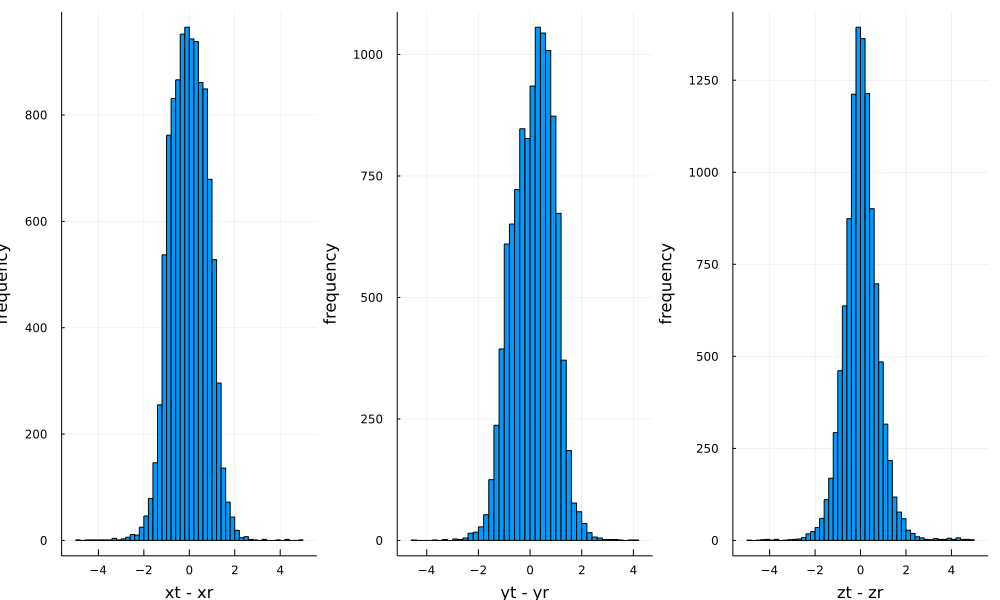

In [700]:
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

In [701]:
xmu, xstd = JPetalo.mean_std(n3df.xt1 - n3df.x1, -2.0, 2.0)
@printf "Resolution in x (mm) = %5.1f" xstd

Resolution in x (mm) =   0.8

In [702]:
xmu, xstd = JPetalo.mean_std(n3df.yt1 - n3df.y1, -2.0, 2.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   0.8

In [703]:
xmu, xstd = JPetalo.mean_std(n3df.zt1 - n3df.zr1, -2.0, 2.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   0.7

## Resolution in xyz (r from q)

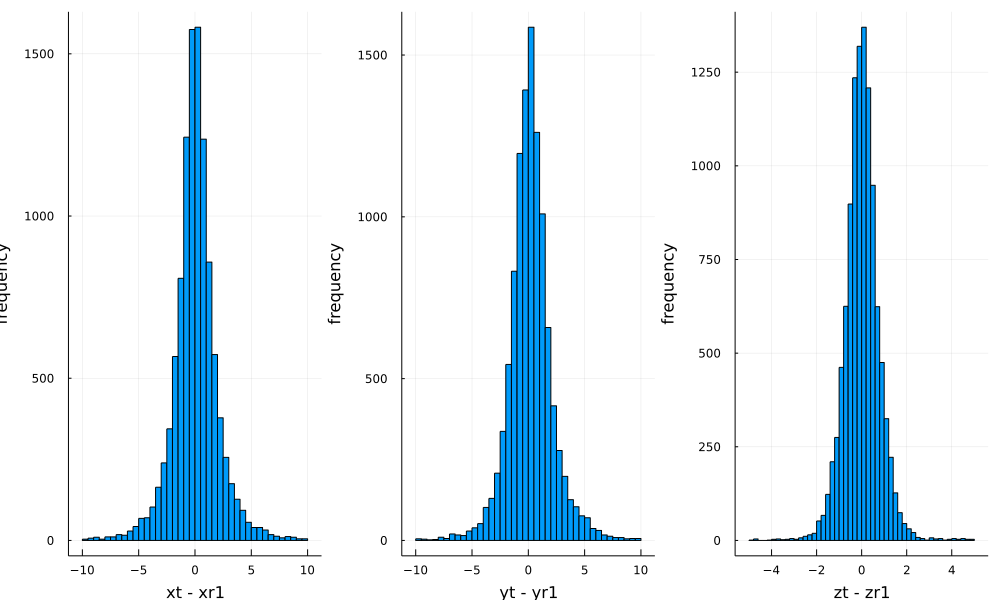

In [750]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.xr1, "xt - xr1", 50,  -10., 10.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.yr1, "yt - yr1", 50,  -10., 10.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.zr1, "zt - zr1", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

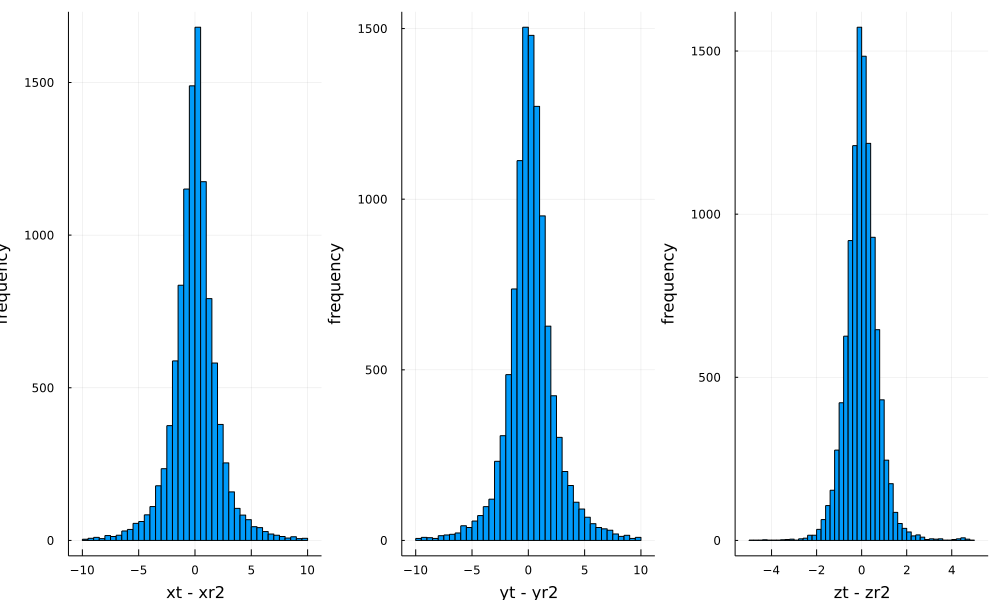

In [751]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt2 - n3df.xr2, "xt - xr2", 50,  -10., 10.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yt2 - n3df.yr2, "yt - yr2", 50,  -10., 10.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zt2 - n3df.zr2, "zt - zr2", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

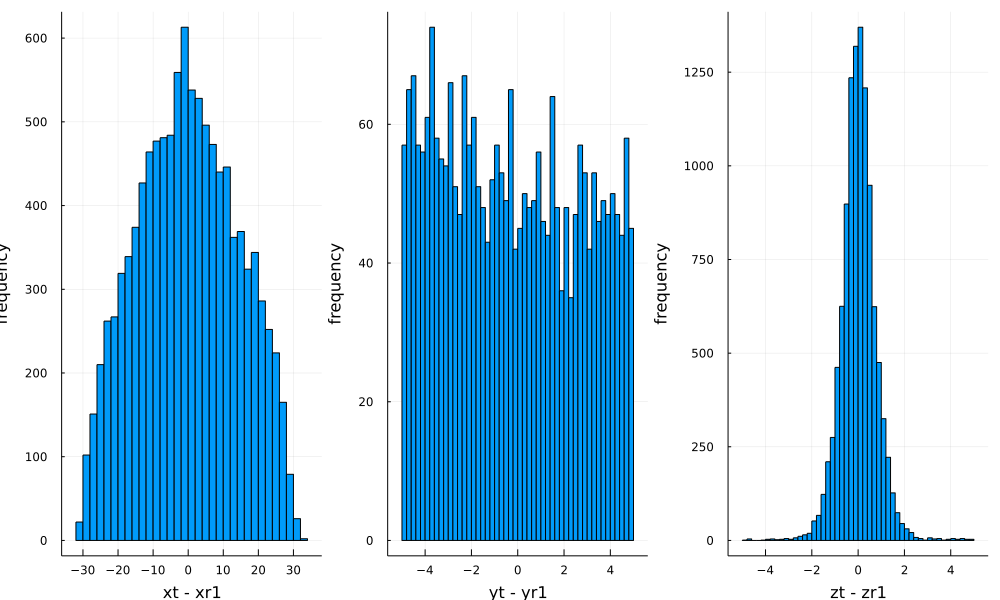

In [752]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.xR1, "xt - xr1", 50,  -50., 50.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.yR1, "yt - yr1", 50,  -5., 5.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.zR1, "zt - zr1", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

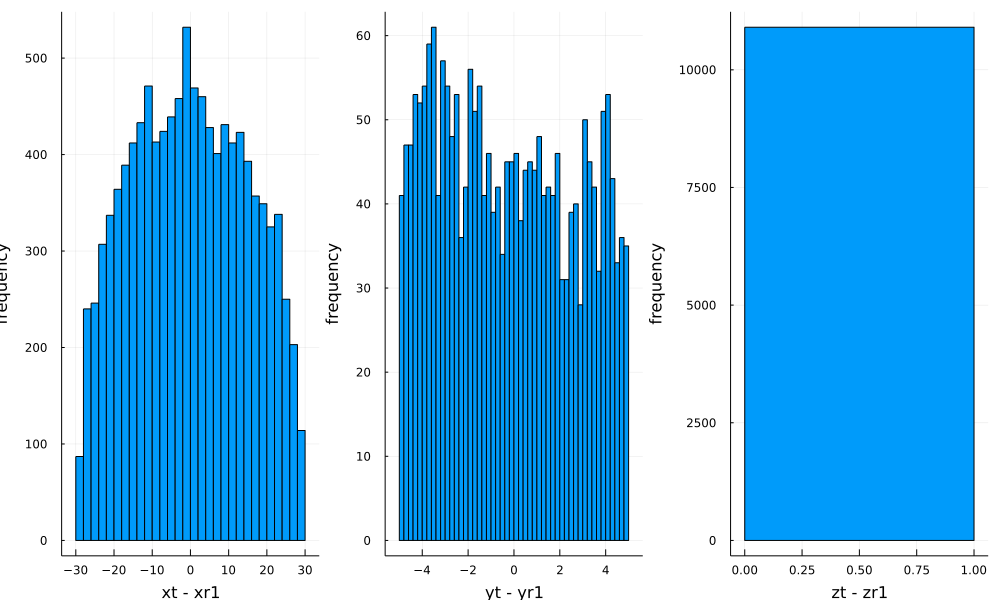

In [753]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xr1 - n3df.xR1, "xt - xr1", 50,  -50., 50.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hytyr, pytyr = JPetalo.hist1d(n3df.yr1 - n3df.yR1, "yt - yr1", 50,  -5., 5.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
hztzr, pztzr = JPetalo.hist1d(n3df.zr1 - n3df.zR1, "zt - zr1", 50,  -5., 5.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

In [754]:
n3dfx = JPetalo.select_by_column_value(n3df, "xs", 0.0);

In [755]:
n3dfxy = JPetalo.select_by_column_value(n3dfx, "ys", 10.0);

In [756]:
n3dfxyz = JPetalo.select_by_column_value(n3dfxy, "zs", 0.0);

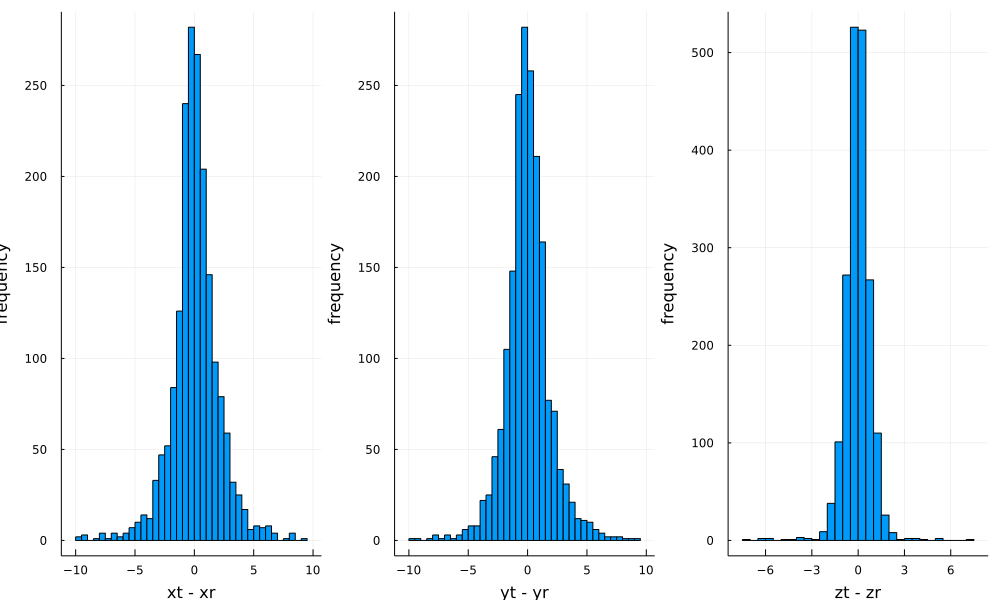

In [757]:
hx, px = JPetalo.hist1d(n3dfxyz.xt1 - n3dfxyz.xr1, "xt - xr", 50,  -10., 10.)
hy, py = JPetalo.hist1d(n3dfxyz.yt1 - n3dfxyz.yr1, "yt - yr", 50,  -10., 10.)
hz, pz = JPetalo.hist1d(n3dfxyz.zt1 - n3dfxyz.zr1, "zt - zr", 50,  -10., 10.)
plot(px, py, pz, layout = (1, 3), size = (1000, 600), legend=false, fmt = :png)

In [712]:
xmu, xstd = JPetalo.mean_std(n3dfxyz.xt1 - n3dfxyz.xr1, -5., 5.)
@printf "Resolution in x (mm) = %5.1f" xstd

Resolution in x (mm) =   3.0

## TOF

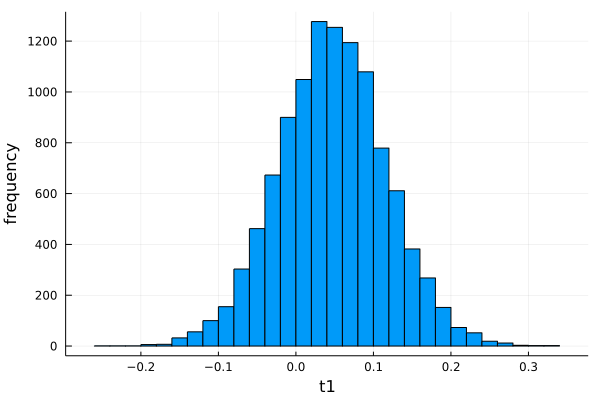

In [820]:
ht1, pt1 = JPetalo.hist1d(n3df.t1 -n3df.tr1, "t1", 50,  -100., 100.)
plot(pt1, legend=false)

In [714]:
function ct12(df; reco=true)
    if reco
        return 1000.0*(df.tr1 - df.tr2)
    else
        return 1000.0 * (df.t1 - df.t2)
    end
end
        


ct12 (generic function with 1 method)

In [789]:
t12 = ct12(n3df, reco=true);

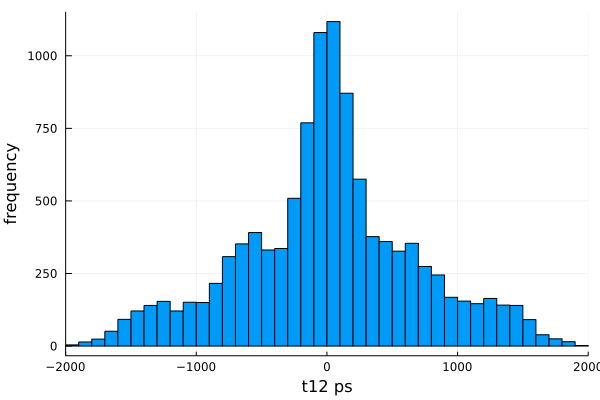

In [790]:
ht1t2, pt1t2 = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(pt1t2, xlimit=(-2000.0,2000.0), legend=false)

In [791]:
xmu, xstd = JPetalo.mean_std(t12, -200.0, 200.0)

(5.493686951537257, 107.16412258878883)

In [792]:
c0 =uconvert(mm/ns, float(SpeedOfLightInVacuum))

299.792458 mm ns⁻¹

In [793]:
cc = convert(Float32, c0/(mm*ns^-1))

299.79245f0

In [794]:
function ctsr(df; reco=true)
    if reco
        tsr1 = [JPetalo.dxyz([df.xr1[i], df.yr1[i], df.zr1[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        tsr2 = [JPetalo.dxyz([df.xr2[i], df.yr2[i], df.zr2[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        
    else
        tsr1 = [JPetalo.dxyz([df.x1[i], df.y1[i], df.z1[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
        tsr2 = [JPetalo.dxyz([df.x2[i], df.y2[i], df.z2[i]], 
                             [df.xs[i], df.ys[i], df.zs[i]]) for i in 1:nrow(df)]/cc
    end
    return 1000.0*(tsr1 - tsr2)
end

ctsr (generic function with 1 method)

In [795]:
tsr12 = ctsr(n3df, reco=true);

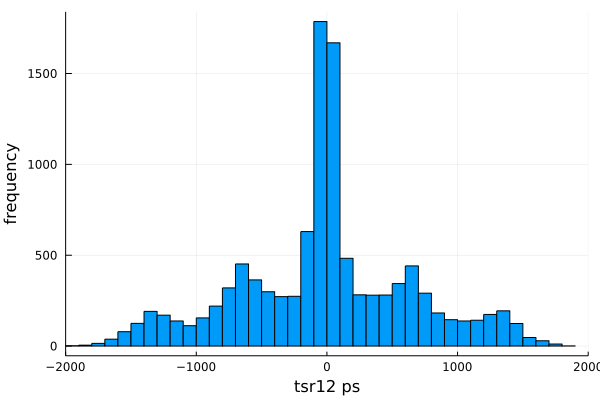

In [796]:
htsr12, psr1t2 = JPetalo.hist1d(tsr12, "tsr12 ps", 50,  -2000., 2000.)
plot(psr1t2, xlimit=(-2000.0,2000.0),legend=false) 

In [797]:
xmu, xstd = JPetalo.mean_std(tsr12, -200.0, 200.0)

(-6.023897218088708, 84.24210105113686)

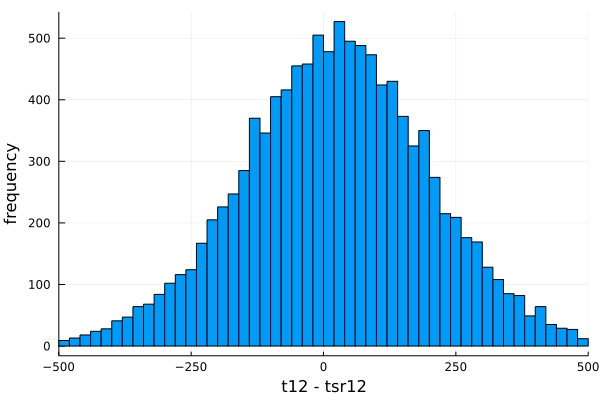

In [807]:
h12, p12 = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 50,  -500., 500.)
plot(p12, xlimit=(-500.0,500.0),legend=false) 

In [808]:
xmu, xstd = JPetalo.mean_std(t12-tsr12, -500.0, 500.0)

(22.658412023064894, 174.2426720219443)

In [800]:
function crb(df; reco=true)
    clxe = cc/1.6
    if reco
        trb1 = [JPetalo.dxyz([df.xr1[i], df.yr1[i], df.zr1[i]], 
                             [df.xb1[i], df.yb1[i], df.zb1[i]]) for i in 1:nrow(df)]/clxe;
        trb2 = [JPetalo.dxyz([df.xr2[i], df.yr2[i], df.zr2[i]], 
                             [df.xb2[i], df.yb2[i], df.zb2[i]]) for i in 1:nrow(df)]/clxe;
        
    else
        trb1 = [JPetalo.dxyz([df.x1[i], df.y1[i], df.z1[i]], 
                             [df.xb1[i], df.yb1[i], df.zb1[i]]) for i in 1:nrow(df)]/clxe;
        trb2 = [JPetalo.dxyz([df.x2[i], df.y2[i], df.z2[i]], 
                             [df.xb2[i], df.yb2[i], df.zb2[i]]) for i in 1:nrow(df)]/clxe;
     end
    return 1000.0*(trb1 - trb2)
end

crb (generic function with 1 method)

In [809]:
trb12 = crb(n3df, reco=true);

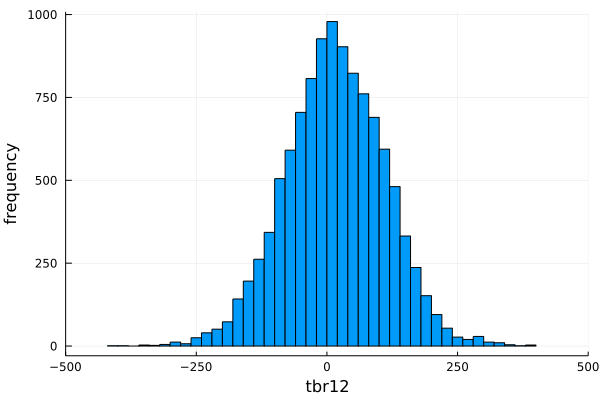

In [810]:
htrb12, ptrb12 = JPetalo.hist1d(trb12, "tbr12", 50,  -500., 500.)
plot(ptrb12, xlimit=(-500.0,500.0), legend=false) 

In [811]:
xmu, xstd = JPetalo.mean_std(trb12, -200.0, 200.0)

(13.870338242010398, 84.212487479426)

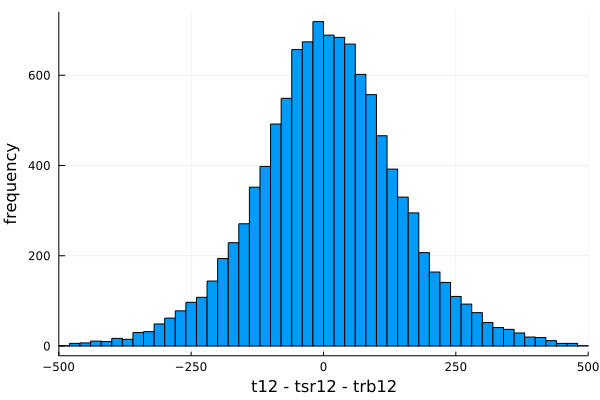

In [813]:
h12, p12 = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 75,  -500., 500.)
p12 = plot(p12, xlimit=(-500.0,500.0), legend=false) 

In [814]:
xmu, xstd = JPetalo.mean_std(trb12, -250.0, 250.0)

(14.715129868918353, 89.92970927984445)

In [785]:
function gfit_gauss(x, xmin, xmax, bins=50)
    function gausx(x, μ, σ, N)
        return N * exp(-(x - μ)^2/(2*σ^2))
    end
    
    xmu, xstd = JPetalo.mean_std(x, xmin, xmax)
    @debug xmu xstd
    
    h = JPetalo.hist1d(x,  bins, xmin, xmax)
    edges = collect(h.edges[1])
    w = h.weights
    c =[0.5 *(edges[i] + edges[i+1]) for i in 1:length(edges)-1]
    @debug "histo" edges w c 

    @. gauss1(x, p) = p[1]* exp(-(x - xmu)^2/(2*xstd^2))
    p0 = [1.0]
    fq = curve_fit(gauss1, c, w, p0)    
    NN =coef(fq)[1][1]
    @debug "gauss1" NN
     
    @. gauss3(x, p) = p[1]* exp(-(x - p[2])^2/(2*p[3]^2))
    p0 = [NN, xmu, xstd]
    fq = curve_fit(gauss3, c, w, p0)
    cfq = coef(fq)
    @debug "coef(fq)" cfq
    NN = cfq[1]
    mu =cfq[2]
    std  =cfq[3]
    @debug "gauss3" NN mu std
  
    return xmu, xstd, mu, std, NN, c, gausx.(c, (mu,), (std,), (NN),)    
end

gfit_gauss (generic function with 2 methods)

In [817]:
xmu, xstd, mu, std, NN, xg, yg = gfit_gauss(t12 - tsr12 - trb12, -500.0, 500.0, 50)

(7.713175674563837, 135.36847425582624, 7.631388425042082, 121.58814756547928, 693.7399952641822, [-490.0, -470.0, -450.0, -430.0, -410.0, -390.0, -370.0, -350.0, -330.0, -310.0  …  310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0], [0.15989235941396313, 0.3092622793340116, 0.5822044835876059, 1.0667766246767967, 1.902483014002822, 3.3023069382222, 5.579090907634181, 9.174001165475403, 14.682617866195187, 22.871652961566543  …  31.498645593975677, 20.642638119219374, 13.167031367658513, 8.174475436923528, 4.939480418696805, 2.905039186387769, 1.6629227462736074, 0.9264916393970746, 0.5024123279325573, 0.2651724627136659])

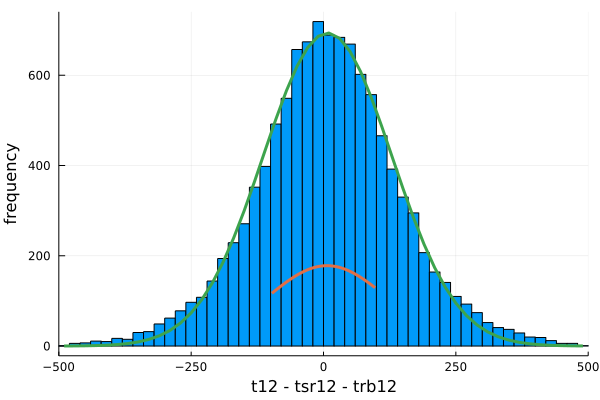

In [818]:
p12 = plot!(p12, xg, yg, lw=3, xlimit=(-500.0,500.0), legend=false) 

In [819]:
@info "TOF resolution = $std ps" 

┌ Info: TOF resolution = 121.58814756547928 ps
└ @ Main In[819]:1


In [582]:
xmu, xstd, mu, std, NN, xg, yg = JPetalo.fit_gauss(t12 - tsr12 - trb12, -100.0, 100.0, 50)

(-1.6892970924405932, 24.44586024974722, -1.9176580293233148, 17.51611947689116, 1691.2616767223615, [-97.5, -92.5, -87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5  …  52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5], [0.0005784133567832617, 0.0026364924096051977, 0.011077132442556287, 0.0428983691552597, 0.15313230749328638, 0.5038548951393932, 1.5281174973365652, 4.271895552060645, 11.007713398659426, 26.144853480300466  …  13.563456727078952, 5.3645947840535815, 1.9557623019204589, 0.6572155480295411, 0.20356926026639094, 0.058120478164669476, 0.015295327118575475, 0.0037102311848758248, 0.0008295752450439349, 0.00017097129744928397])

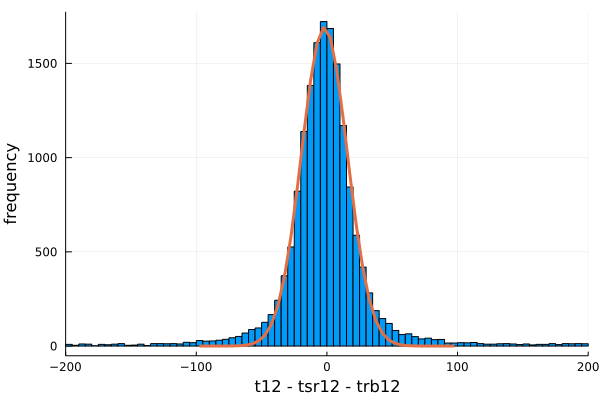

In [583]:
h12, p12 = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 75,  -200., 200.)
p12 = plot(p12, xlimit=(-200.0,200.0), legend=false) 
p12 = plot!(p12, xg, yg, lw=3, xlimit=(-200.0,200.0), legend=false) 